In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive
%cd MyDrive
%cd 'Colab Notebooks'

%cd ML\ in\ der\ Umformtechnik


Mounted at /content/drive
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/ML in der Umformtechnik


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Load the ResNet50 model without the top classification layer
model_resnet50 = ResNet50(weights='imagenet', include_top=False)

# Define the directory path
directory_path = "Real-Datensatz/TopviewImage_Ellipse/"
images_list = []

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model_resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
print(model_resnet50)

In [ ]:
%ls

sample_data/


In [ ]:
from keras.preprocessing import image
import cv2
import numpy as np

def extract_features_resnet50(img_path):
    """
    Function to extract features from an image using ResNet50
    """
    # Load the image
    img = image.load_img(img_path)
    # Convert the PIL image to a numpy array
    img_array = image.img_to_array(img)

    # Cropping the image based on x: 0-0.7 and y: 0-1 proportions
    height, width, _ = img_array.shape
    cropped_img_array = img_array[0:int(height * 1), 0:int(width * 0.7)]

    # Resize the cropped image to target size (224, 224)
    resized_img = cv2.resize(cropped_img_array, (224, 224))
    # Ensure the image array is of type uint8
    resized_img = resized_img.astype(np.uint8)

    # Apply CLAHE for over-exposure correction
    gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gray)

    # Merge the channels back
    resized_img[:, :, 0] = clahe_img
    resized_img[:, :, 1] = clahe_img
    resized_img[:, :, 2] = clahe_img

    # Expand the shape of the array to (1, 224, 224, 3)
    expanded_img_array = np.expand_dims(resized_img, axis=0)

    # Preprocess the image for the ResNet50 model
    # Assuming preprocess_input is already imported or defined elsewhere
    preprocessed_img = preprocess_input(expanded_img_array)

    # Assuming images_list is a global variable or is provided elsewhere
    images_list.append(preprocessed_img[0])  # Append the squeezed image to the list

    # Assuming model_resnet50 is a global variable or is provided elsewhere
    # Get features from the ResNet50 model
    features = model_resnet50.predict(preprocessed_img)

    # Flatten the features to use them in clustering or other tasks
    return features.flatten()

feature_list = []
image_file_names = []  # list to store image file names

for filename in os.listdir(directory_path):
    if filename.endswith(".png"):
        file_path = os.path.join(directory_path, filename)
        features = extract_features_resnet50(file_path)
        feature_list.append(features)
        image_file_names.append(filename)

1/1 [==============================] - 0s 23ms/step


In [ ]:
feature_matrix = np.array(feature_list)
# np.save('./ResNet_feature_matrix_top.npy', feature_matrix)



In [ ]:
print(feature_matrix.shape)

(248, 100352)


In [ ]:
print(feature_list)

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       0.5526246], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.       , 0.2740457, 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.        , 0.84829533, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.40552938], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.       , 0.4090196, 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0.       , 1.1017778, 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.24117422], dtype=float32), ar

In [ ]:
print(len(feature_list))

248


In [ ]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(feature_matrix)
labels = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


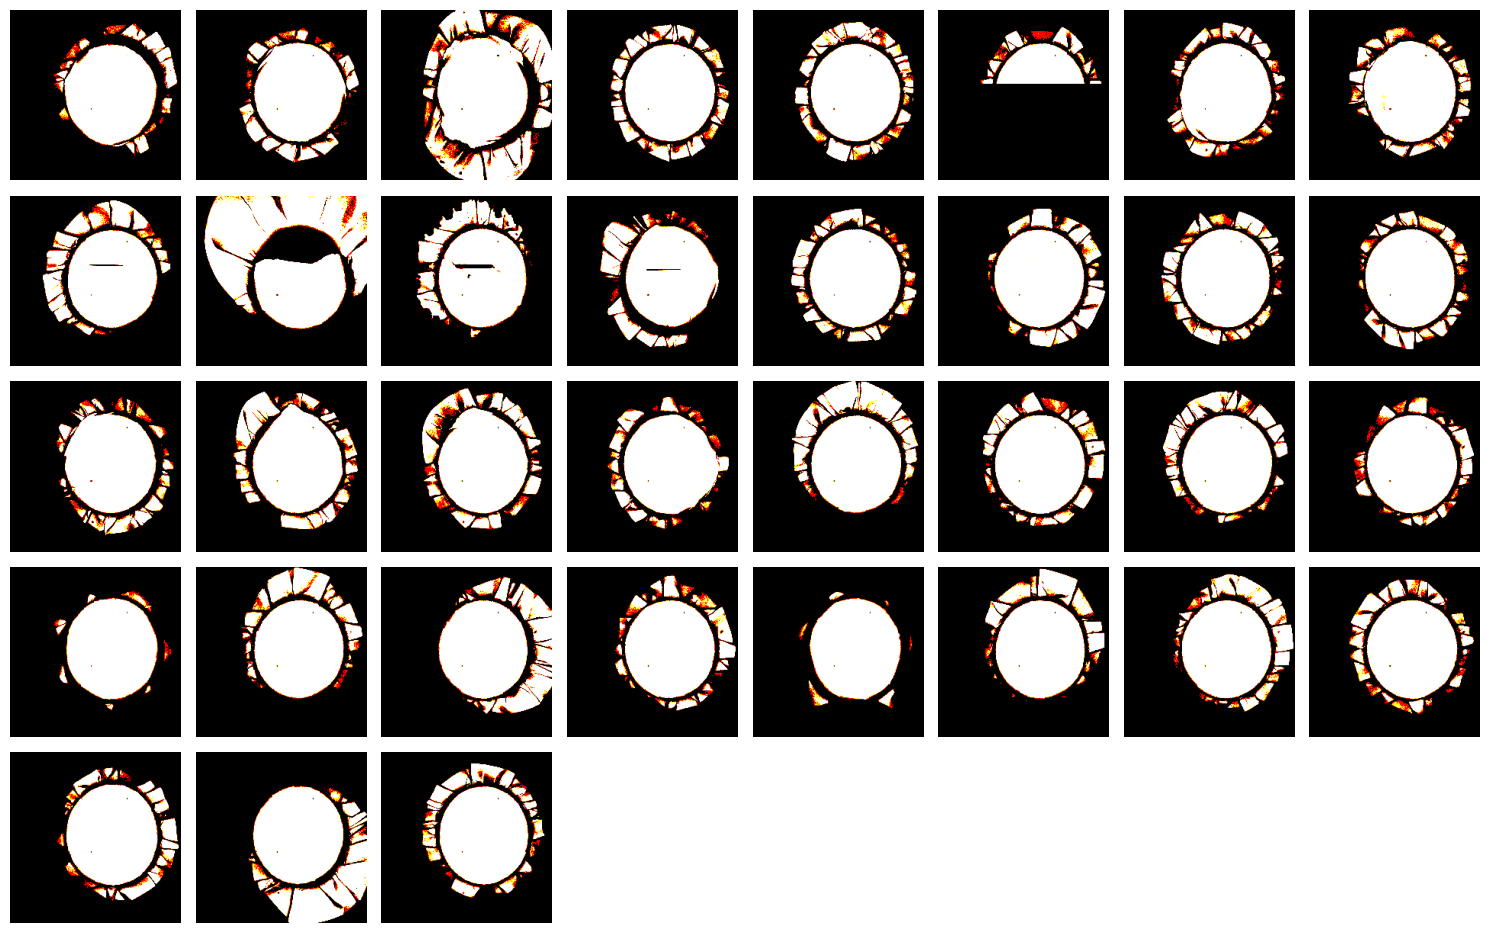

In [ ]:
def display_images_from_cluster(cluster_number, images_list, labels):
    """Display images from a specified cluster."""
    indices = [i for i, label in enumerate(labels) if label == cluster_number]
    plt.figure(figsize=(15, 15))  # Increase size for better view with more images
    num_images_to_display = 64  # Change this as per your requirement
    for i, index in enumerate(indices[:num_images_to_display]):
        plt.subplot(8, 8, i+1)  # Change the grid size to 6x6
        plt.imshow(images_list[index])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display images from, say, cluster 2
display_images_from_cluster(0, images_list, labels)


In [ ]:
import pandas as pd  # For creating a CSV

# Merge clusters 0 and 2, and reassign labels
new_labels = []
for label in labels:
    if label in [1, 2, 3]:
        new_labels.append(0)  # 0 represents 'good'
    else:
        new_labels.append(1)  # 1 represents 'bad'

# Save to CSV
df = pd.DataFrame({
    'image_file_name': image_file_names,
    'label': new_labels
})

csv_filename = "Res_top_image_labels.csv"
df.to_csv(csv_filename, index=False)
print(f"Labels saved to {csv_filename}")

Labels saved to Res_top_image_labels.csv
